In [238]:
%matplotlib inline

from time import time
from math import sqrt, floor
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace
from pandas.plotting import scatter_matrix
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
plt.style.use = "default"

In [239]:
def merge(df, labels):
    return labels.merge(df, left_index=True,right_index=True)

In [240]:
train = pd.read_csv("TrainData4.txt", delim_whitespace=True, header=None)
labels = pd.read_csv("TrainLabel4.txt", sep='\t', header=None)
labels = labels.rename(columns={0: "label"})

In [241]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
count,2547.000,2547.000,2547.000,2547.000,2547.000,2547.000,2547.000,2547.000,2547.000,2547.000,...,2547.000,2547.000,2547.000,2547.000,2547.000,2547.000,2547.000,2547.000,2547.000,2547.000
mean,-0.094,-0.092,-0.101,-0.055,-0.032,-0.052,-0.043,-0.057,-0.035,0.099,...,-42.102,6.334,-6.836,-7.893,-21.903,18.065,31.468,-25.369,5.620,-6.596
std,0.073,0.072,0.067,0.037,0.029,0.037,0.100,0.106,0.089,0.064,...,167.868,174.852,178.018,179.910,168.795,157.893,158.204,162.879,172.970,176.920
min,-0.528,-0.448,-0.555,-0.269,-0.417,-0.455,-0.769,-0.427,-0.520,-0.007,...,-316.170,-282.080,-280.250,-291.190,-322.290,-327.970,-315.200,-301.540,-331.640,-287.410
25%,-0.109,-0.141,-0.127,-0.070,-0.037,-0.057,-0.113,-0.109,-0.081,0.049,...,-174.565,-172.930,-176.520,-184.315,-179.855,-162.655,-157.265,-178.720,-179.000,-176.760
50%,-0.071,-0.066,-0.086,-0.047,-0.023,-0.045,-0.019,-0.043,-0.017,0.079,...,-134.360,59.293,-154.840,-40.911,-110.000,61.086,126.480,-122.600,79.765,-92.960
75%,-0.047,-0.034,-0.056,-0.028,-0.015,-0.030,0.001,0.015,0.029,0.141,...,153.960,180.205,181.250,179.635,177.155,171.480,175.045,164.830,176.855,179.055
max,-0.004,0.006,-0.004,-0.005,-0.002,-0.006,0.436,0.117,0.242,0.445,...,325.130,323.020,260.090,325.170,333.860,350.450,289.390,299.000,323.950,282.050


In [242]:
labels["label"].value_counts()

8    298
4    292
7    289
1    288
6    287
5    278
2    275
9    270
3    270
Name: label, dtype: int64

In [250]:
# get columns with all values that have greater than 2 stds for the column.
stds = 2
above_stds_counts = train.apply(lambda x: x[x > np.abs(x.mean() + (x.std() * stds))].dropna().size).sort_values(ascending=False)
above_stds_counts = above_stds_counts[above_stds_counts > 0]
# above_stds_counts.head(40)

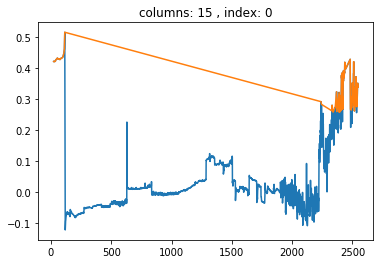

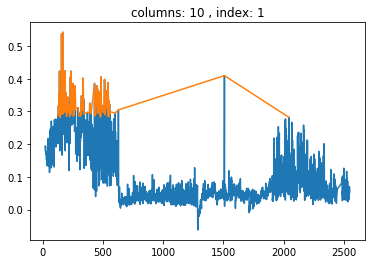

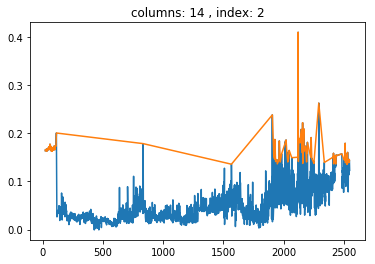

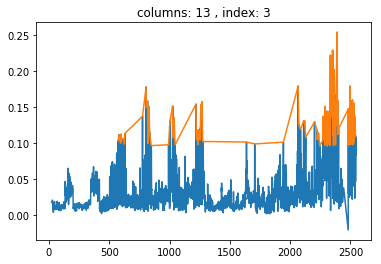

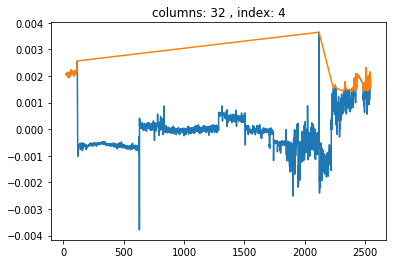

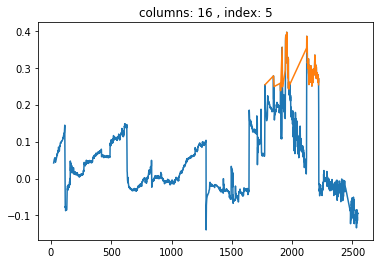

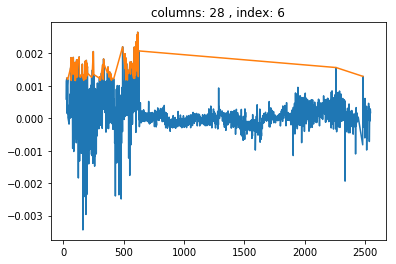

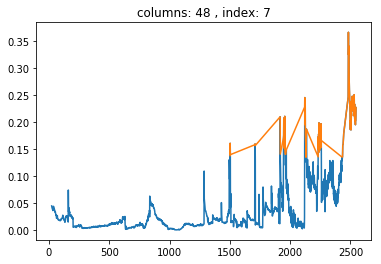

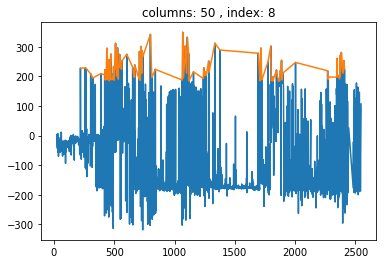

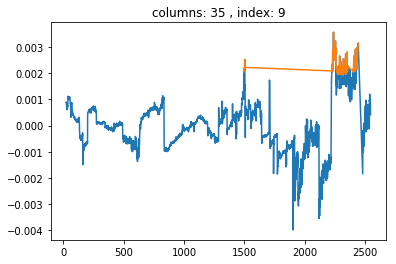

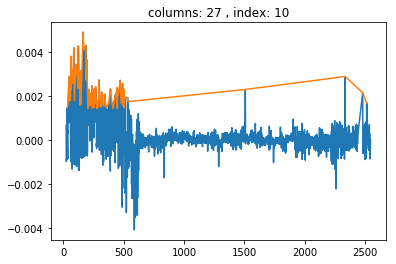

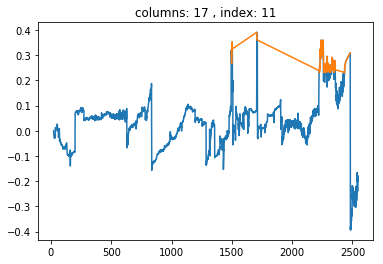

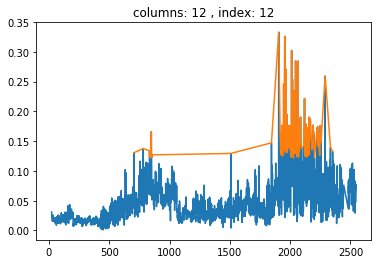

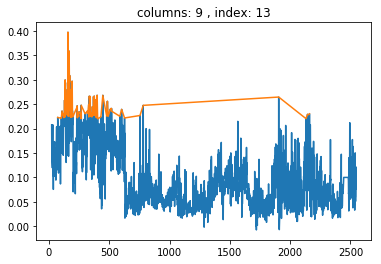

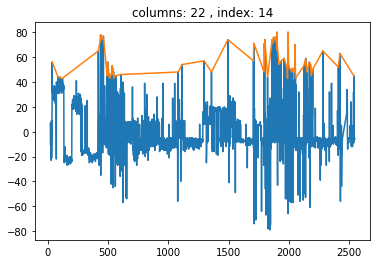

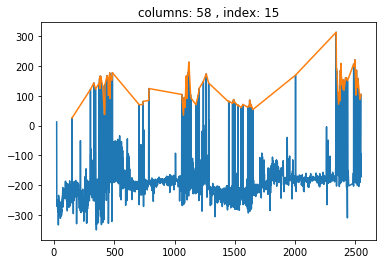

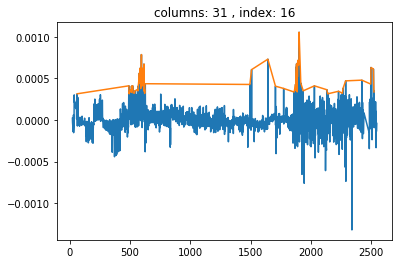

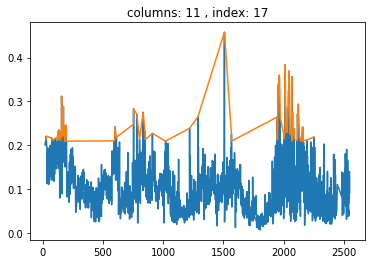

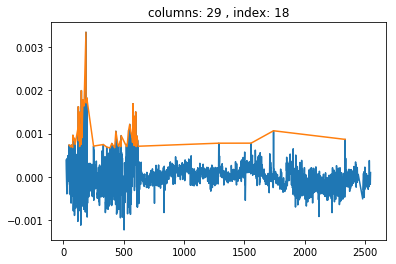

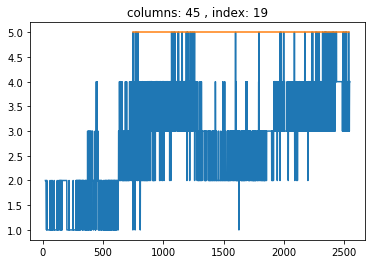

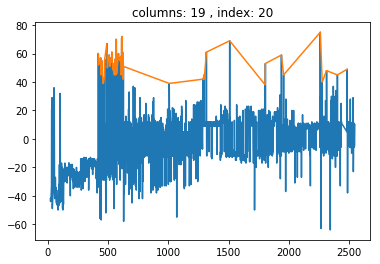

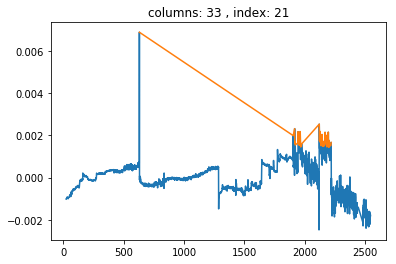

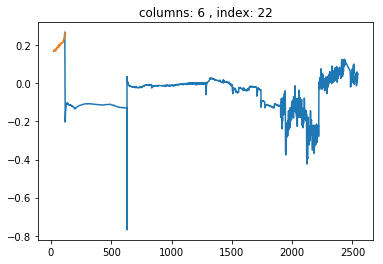

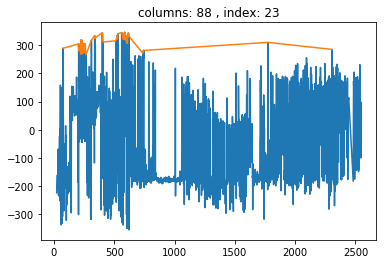

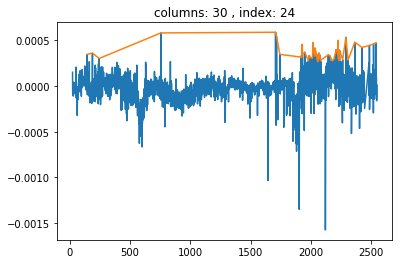

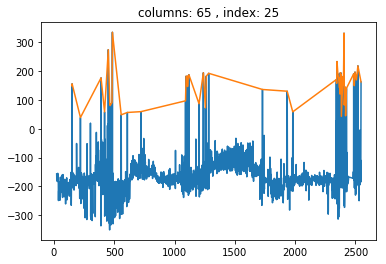

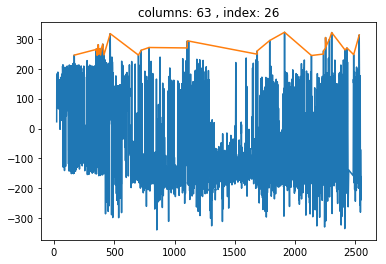

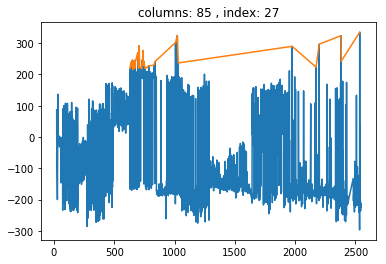

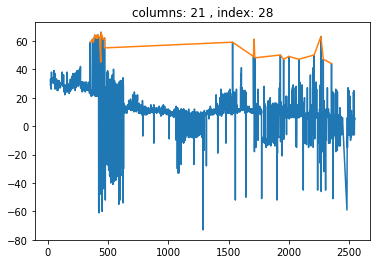

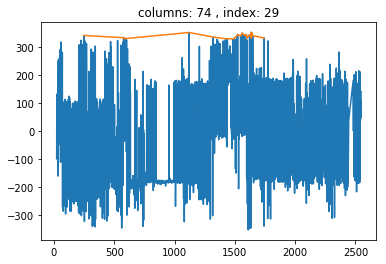

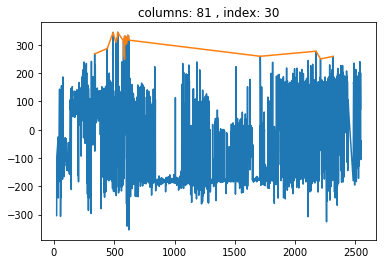

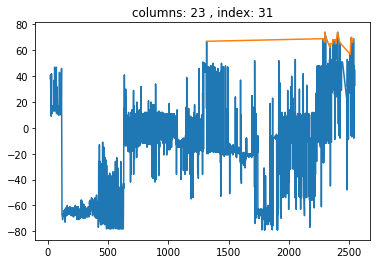

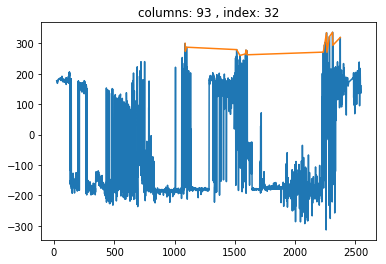

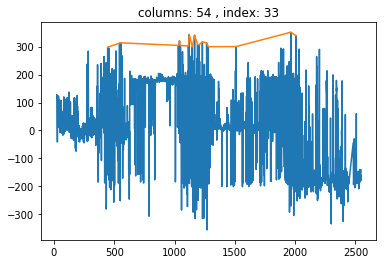

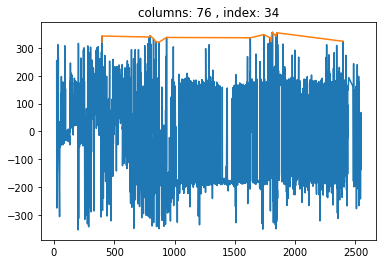

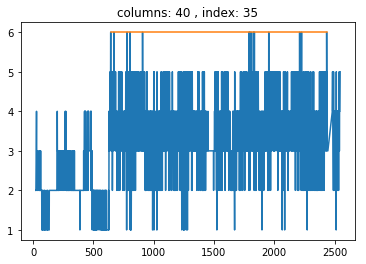

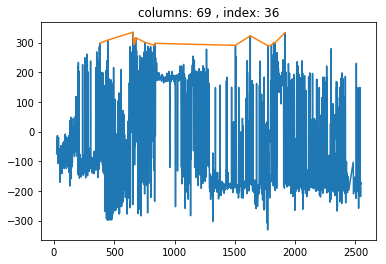

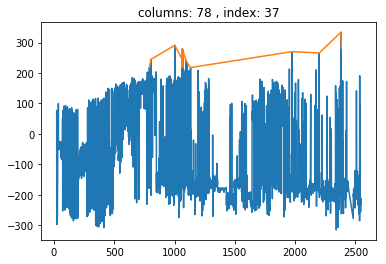

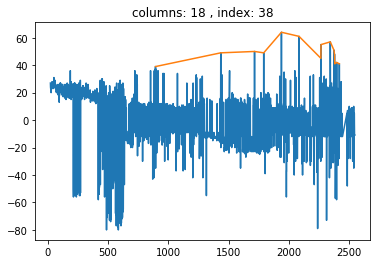

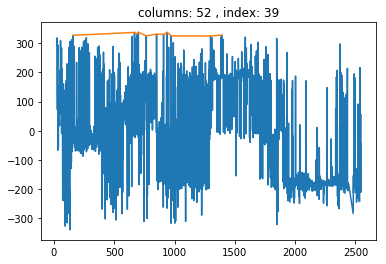

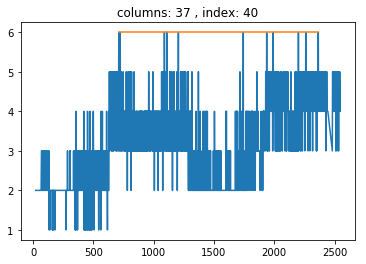

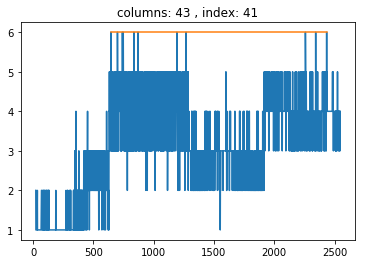

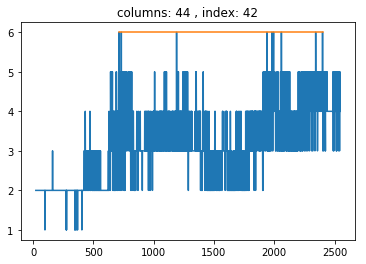

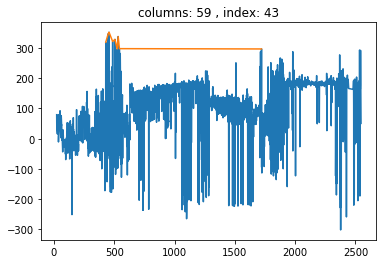

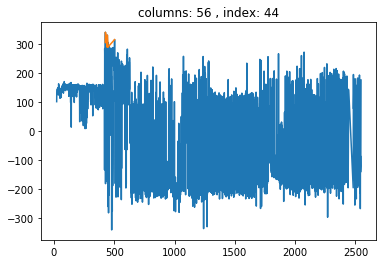

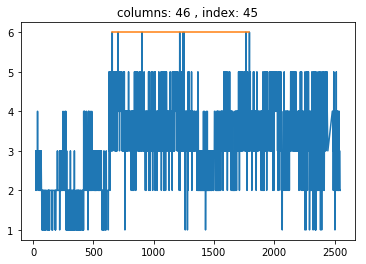

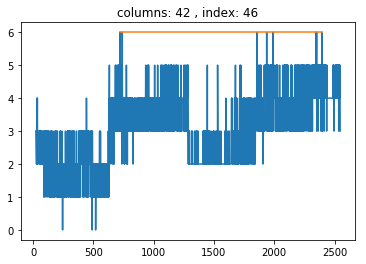

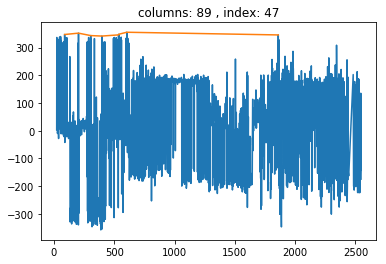

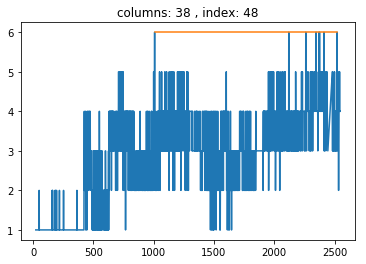

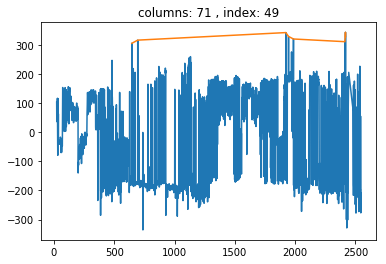

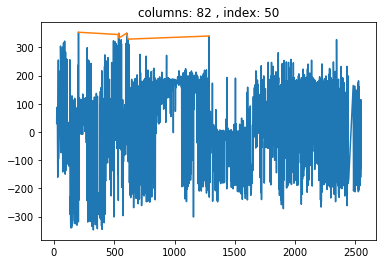

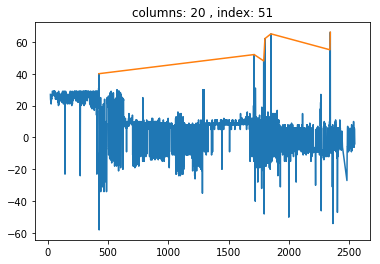

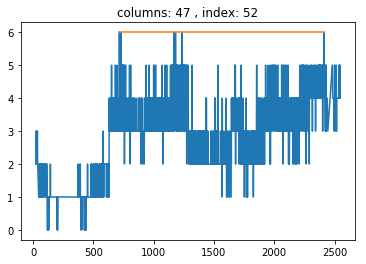

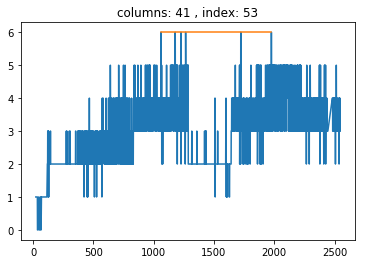

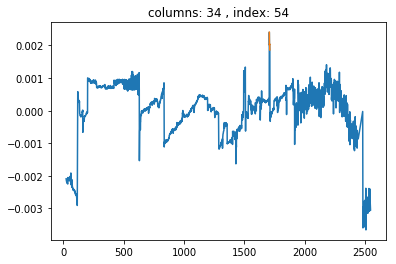

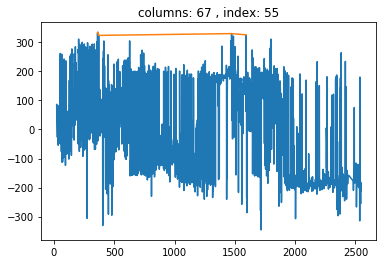

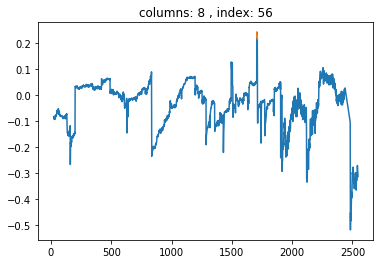

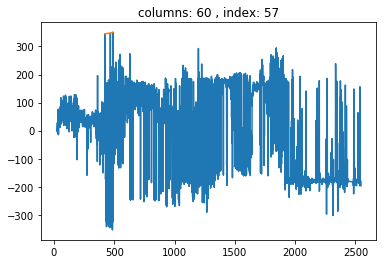

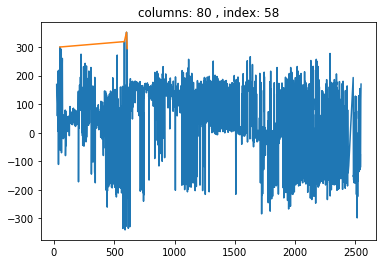

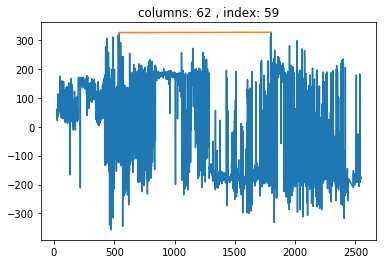

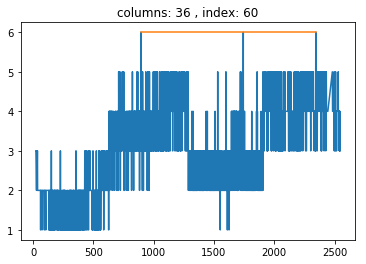

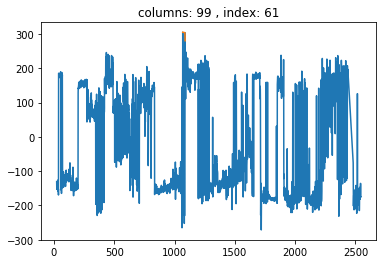

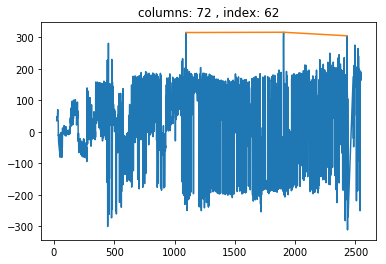

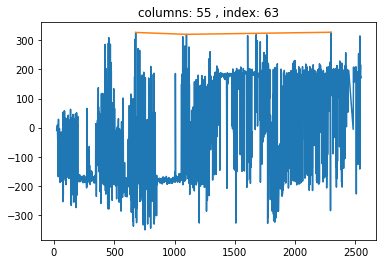

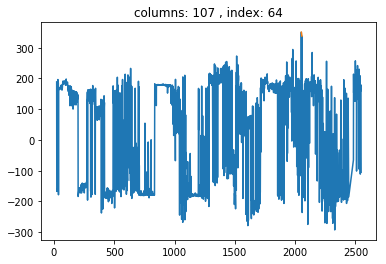

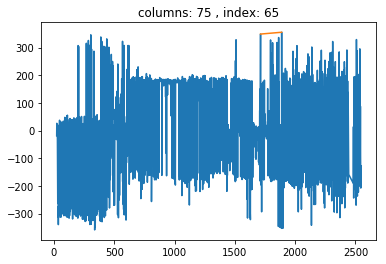

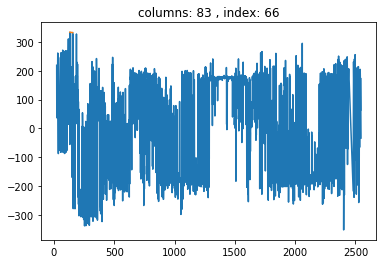

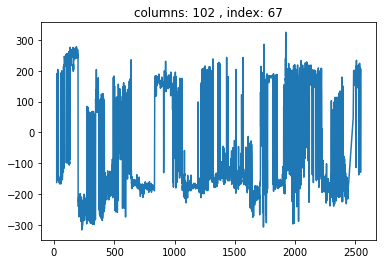

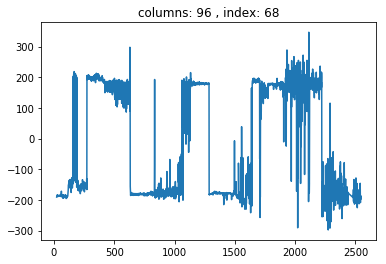

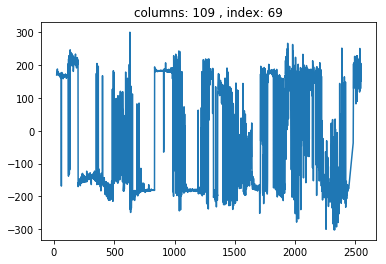

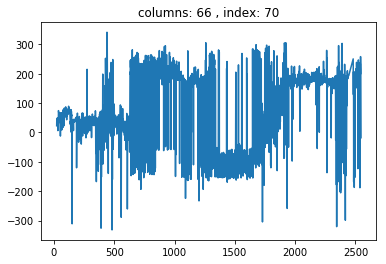

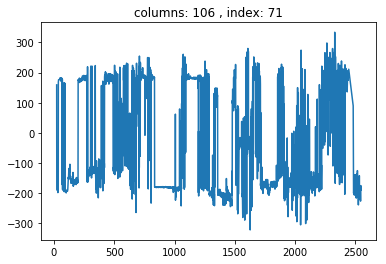

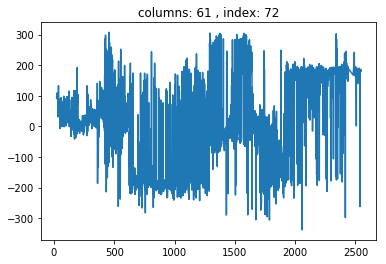

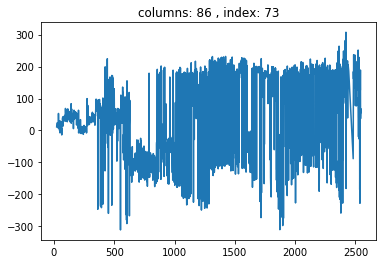

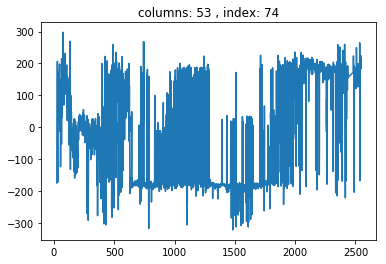

In [251]:
for y in range(above_stds_counts.size):
    h = train[above_stds_counts.index[y]]
    h.plot.line()
    h[h > np.abs(h.mean() + (h.std() * stds))].plot.line()
    plt.title("columns: {} , index: {}".format(above_stds_counts.index[y], y))
    plt.show()

Two standard deviations seems to get the best splits, and onlter after the first 40 std counds. Lets remove those

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1281437b8>,
      dtype=object)

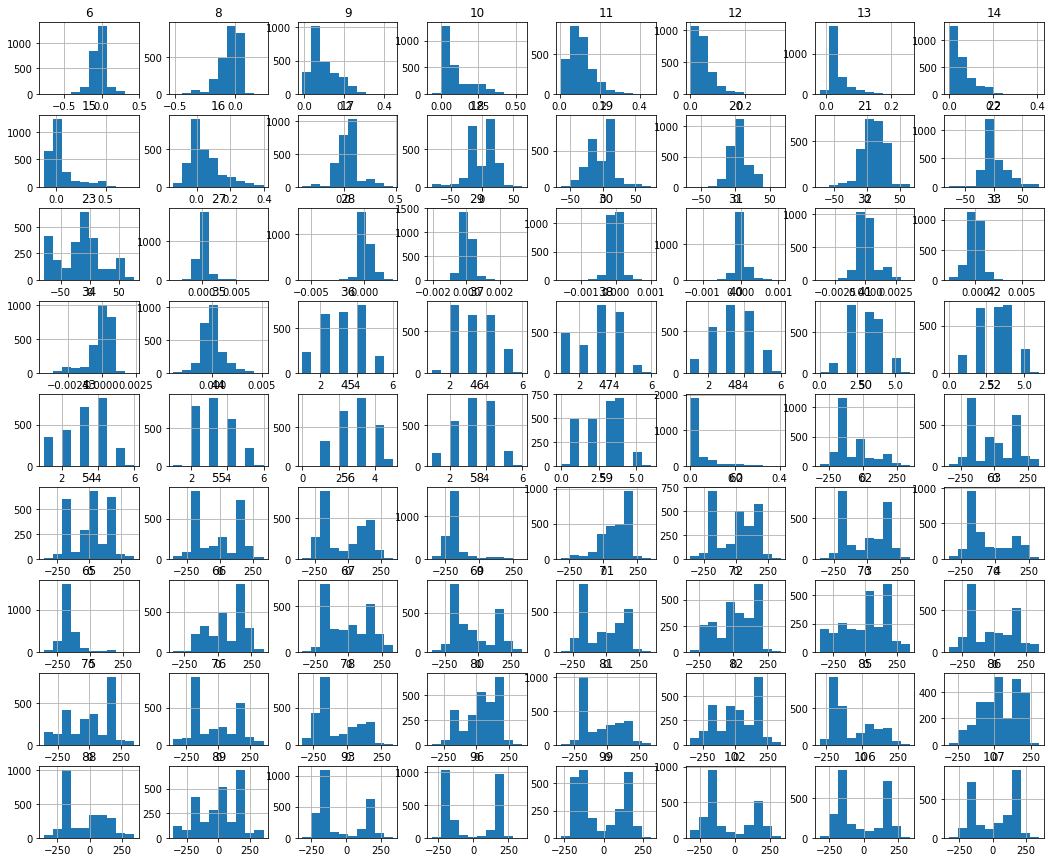

In [245]:
train[above_stds_counts.index].hist(figsize=(18,15))

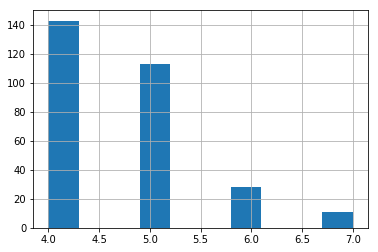

In [257]:
above_stds_counts = above_stds_counts.iloc[:40]
# for each col, get indices where std * 2 > mean.
f = train[above_stds_counts.index][train[above_stds_counts.index] > train.mean() + (train.std() * 2)].count(axis=1).sort_values(ascending=False)
train = train.drop(index=f[f.gt(5)].index)

In [247]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
count,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,...,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000
mean,-0.088,-0.089,-0.097,-0.054,-0.031,-0.052,-0.052,-0.048,-0.035,0.096,...,-42.578,4.864,-4.876,-3.979,-27.247,19.681,32.019,-26.812,6.091,-7.119
std,0.061,0.070,0.060,0.036,0.028,0.035,0.090,0.097,0.088,0.062,...,167.709,174.793,178.281,180.007,167.425,156.888,157.707,162.367,172.967,176.711
min,-0.444,-0.403,-0.555,-0.263,-0.417,-0.353,-0.769,-0.413,-0.520,-0.007,...,-316.170,-282.080,-280.250,-291.190,-322.290,-292.490,-315.200,-301.540,-331.640,-287.410
25%,-0.107,-0.133,-0.124,-0.070,-0.037,-0.056,-0.113,-0.100,-0.079,0.049,...,-174.555,-173.030,-176.910,-184.370,-179.930,-161.635,-154.812,-178.895,-179.340,-176.300
50%,-0.071,-0.064,-0.085,-0.047,-0.023,-0.045,-0.021,-0.033,-0.017,0.078,...,-134.325,45.210,-148.535,26.730,-116.870,64.866,126.500,-124.090,82.653,-96.230
75%,-0.047,-0.034,-0.056,-0.027,-0.015,-0.030,-0.001,0.018,0.028,0.135,...,153.748,180.370,181.343,179.790,176.985,170.972,175.090,164.055,176.640,179.188
max,-0.004,0.006,-0.004,-0.005,-0.002,-0.006,0.268,0.117,0.242,0.397,...,325.130,323.020,260.090,325.170,333.860,350.450,289.390,299.000,323.950,282.050


In [371]:
# drop columns that are highly correlated with each other. 
corr = train.corr()
corr = corr[corr > .7]

In [388]:
def g(x):
    h = x[x.lt(1)].dropna()
    if not h.empty:
        return pd.Series([h.max(), h.idxmax()], index=["max", "column"])
    else:
        return np.nan
h = corr.apply(g)
h = h.T.dropna()

def j(x):
    smaller = h[h["column"] == x["column"]]["max"].idxmin()
    if x.name == smaller:
        return smaller
    else:
        return np.nan

h = h.drop(index=h[h.duplicated("column", False)].apply(j, axis=1).dropna())

dropped = []
def k(x):
    if x.name not in dropped:
        dropped.append(x.column)
        return x.column
    return np.nan

cols_to_drop = h.apply(k, axis=1).dropna()
train = train.drop(columns=cols_to_drop)

ValueError: labels [  1.  33.  17.  10.  32.  96.  47.  42.  44.  63.  67.  68.  69.  84.
  85.  86.  87.  88.  89.  90.  97. 105. 106. 107. 108. 109. 110. 111.] not contained in axis

In [387]:
train.describe()

,0,2,3,4,5,6,7,8,9,11,...,93,94,95,98,99,100,101,102,103,104
count,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,...,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000,2426.000
mean,-0.088,-0.097,-0.054,-0.031,-0.052,-0.052,-0.048,-0.035,0.096,0.102,...,-60.860,21.468,10.801,-1.202,-18.504,-4.931,54.302,-42.578,4.864,-4.876
std,0.061,0.060,0.036,0.028,0.035,0.090,0.097,0.088,0.062,0.053,...,159.587,167.345,165.829,169.627,146.294,166.158,182.593,167.709,174.793,178.281
min,-0.444,-0.555,-0.263,-0.417,-0.353,-0.769,-0.413,-0.520,-0.007,0.007,...,-313.370,-325.880,-336.730,-227.760,-271.360,-310.110,-332.170,-316.170,-282.080,-280.250
25%,-0.107,-0.124,-0.070,-0.037,-0.056,-0.113,-0.100,-0.079,0.049,0.063,...,-180.127,-152.282,-174.320,-169.667,-152.518,-168.702,-169.053,-174.555,-173.030,-176.910
50%,-0.071,-0.085,-0.047,-0.023,-0.045,-0.021,-0.033,-0.017,0.078,0.095,...,-163.235,47.041,81.007,-97.572,-76.099,-41.927,144.305,-134.325,45.210,-148.535
75%,-0.047,-0.056,-0.027,-0.015,-0.030,-0.001,0.018,0.028,0.135,0.131,...,139.828,181.405,177.153,178.370,141.220,173.343,202.565,153.748,180.370,181.343
max,-0.004,-0.004,-0.005,-0.002,-0.006,0.268,0.117,0.242,0.397,0.458,...,336.190,316.740,329.290,243.330,304.770,295.130,340.140,325.130,323.020,260.090


In [389]:
g = merge(train, labels)
labels = g.pop("label")
labels.to_csv("cleaned_labels.csv")
train.to_csv("cleaned_train.csv")